In [158]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neuromusic/avocado-prices")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/neuromusic/avocado-prices/versions/1


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

df = pd.read_csv(os.path.join(path, "avocado.csv"))

In [160]:
df1.info()  # premilinary inforamation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.8+ MB


In [161]:
df1 = df.drop(["Unnamed: 0"], axis=1)

/var/folders/v7/tlyx9w190ks2gfgzd_j0l5c80000gn/T/ipykernel_71312/3078220144.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df1.dtypes[i] != object:
/var/folders/v7/tlyx9w190ks2gfgzd_j0l5c80000gn/T/ipykernel_71312/3078220144.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df1.dtypes[i] != object:
/var/folders/v7/tlyx9w190ks2gfgzd_j0l5c80000gn/T/ipykernel_71312/3078220144.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

<function matplotlib.pyplot.show(close=None, block=None)>

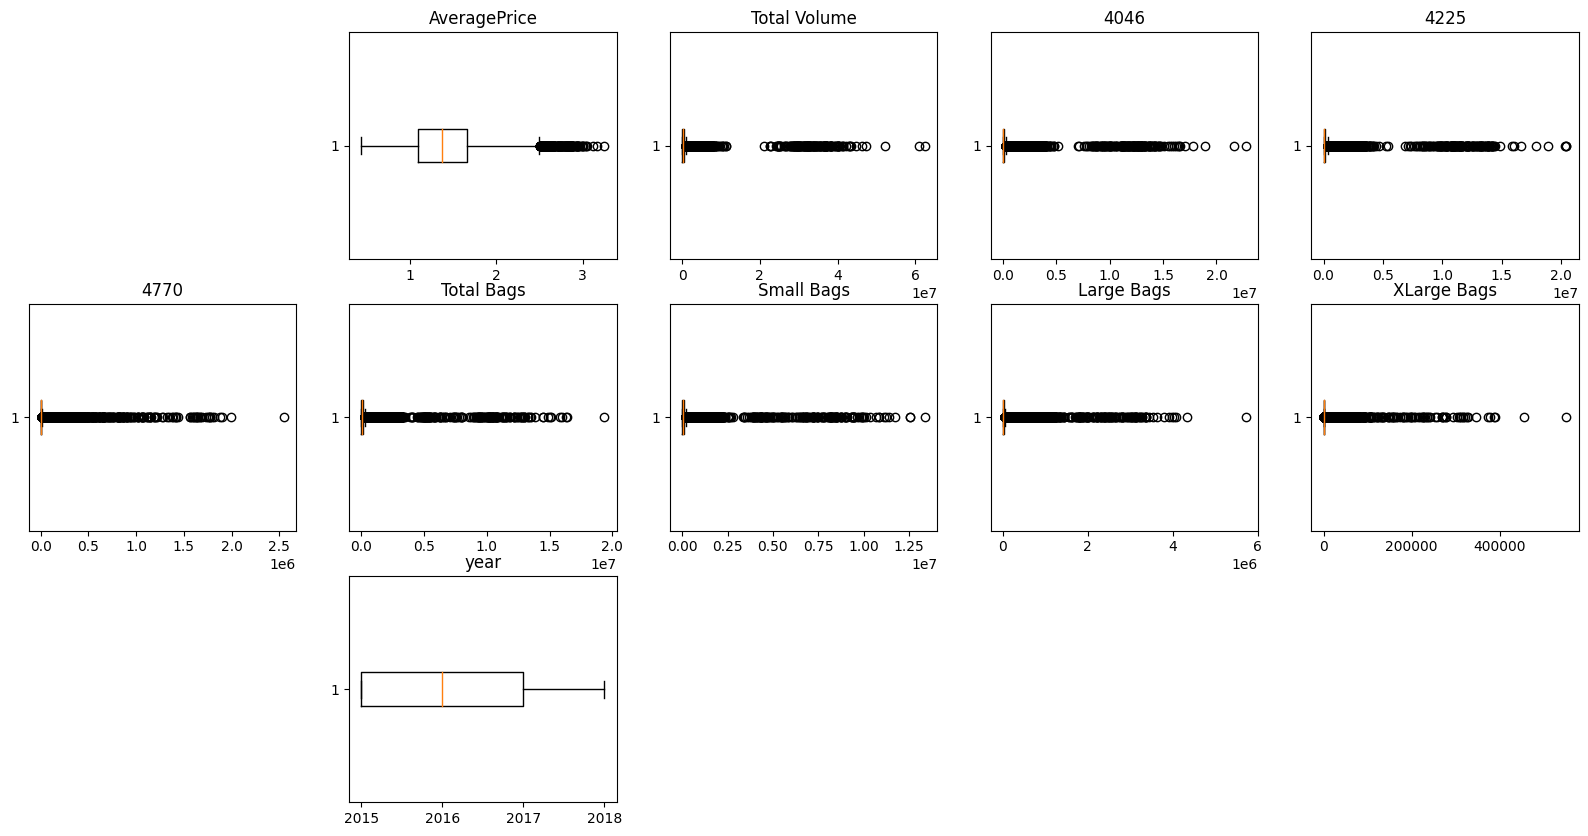

In [162]:
plt.figure(figsize=(20, 10))

for i in range(len(df1.columns)):
    if df1.dtypes[i] != object:
        plt.subplot(3, 5, i + 1)
        plt.boxplot(df1[df1.columns[i]], vert=False)
        plt.title(df1.columns[i])

plt.show

In [163]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [164]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [165]:
categorical_columns = list(df1.select_dtypes("object").columns)

categorical_columns

['Date', 'type', 'region']

In [166]:
ordinal_feature = ["Date"]

nomindal_feature = ["region"]

nomindal_feature = ["type"]

In [167]:
date_ordering = sorted(df1["Date"].unique())

In [168]:
def ordinal_encode(df, column, ordering):
    df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df


def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [169]:
df2 = ordinal_encode(df1, "Date", date_ordering)

In [170]:
df2 = onehot_encode(df1, "region")

In [171]:
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2["type"] = label_encoder.fit_transform(df2["type"])

In [173]:
y = df2["type"]
X = df2.drop(["type"], axis=1)

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_X = scaler.fit_transform(X)

In [175]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(std_X, y, train_size=0.7)

In [194]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(65,))
x = tf.keras.layers.Dense(64, activation="relu")(inputs)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

batch_size = 64
epochs = 83

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0,
)

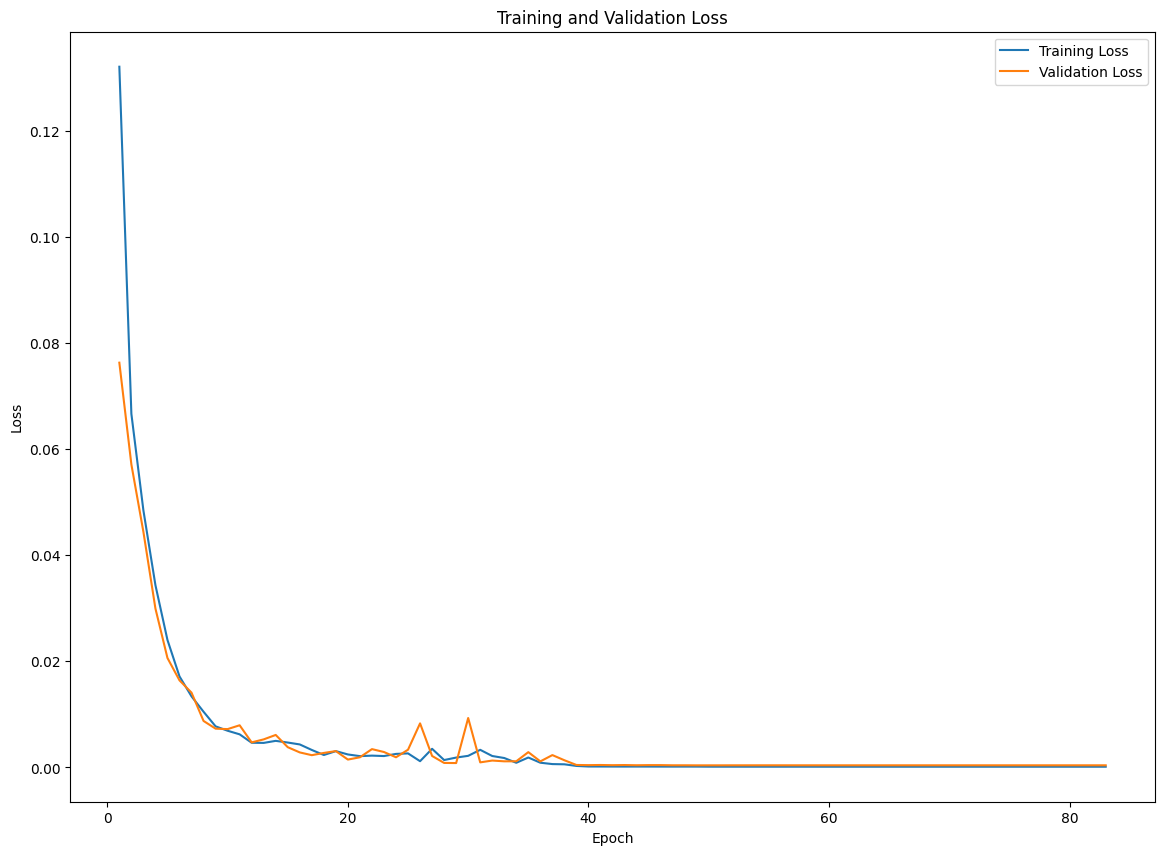

In [195]:
plt.figure(figsize=(14, 10))
epochs_range = range(1, epochs + 1)
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [196]:
np.argmin(val_loss)

48

In [197]:
model.evaluate(X_test, y_test)  # achieved accuracy of 0.9990

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9990 - loss: 7.9936e-04


[0.00046571780694648623, 0.9996346831321716]